# Customer Churn Prediction
_Created by Ade Dwi Aryani, Batch 008_

# 1. Introduction

Data yang akan digunakan yaitu [Telco Customer Churn Dataset](https://www.kaggle.com/blastchar/telco-customer-churn). Data tersebut akan digunakan untuk memprediksi apakah customer akan churn (meninggalkan perusahaan) atau tidak, dengan menggunakan beberapa feature. Model yang digunakan adalah model Artifical Neural Network dengan menggunakan Sequential API dan Functional API. Feature yang digunakan akan menggunakan feature-feature importance (terpenting) atau yang memiliki hubungan keeratan terhadap kemungkinan customer meninggalkan perusahaan atau tidak.

Data set churn yang digunakan adalah UCI Repository dari Machine Learning Database di University of California, Irvine. Dataset ini mencakup informasi tentang:
- Customer churn dalam sebulan terakhir — kolom Churn
- Layanan yang telah didaftarkan oleh setiap pelanggan — kolom phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Informasi akun customer  — sudah berapa lama mereka menjadi customer, contract, payment method, paperless billing, monthly charges, dan total charges
- Info demografis tentang customer — gender, age range, and mempunyai partners dan atau dependents (tanggungan).

## 2. Import Libraries

Sebelum memulai mengolah data dengan menggunakan Python diperlukan berbagai pustaka atau library yang dapat memudahkan proses. Pustaka yang dibutuhkan harus sesuai dengan data, model, dan metode yang digunakan dalam analisis. Pustaka yang dibutuhkan pada analisis ini adalah sebagai berikut:

In [1]:
# Import Libraries


import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# For Preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import tensorflow as tf

# For Define Model Sequential API
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# For Define Model Functional API
from keras.models import Model
from keras.layers import Input

# For Evaluation Model
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# For Model Saving
import pickle
from keras.models import load_model

# 3. Data Loading

Data loading dilakukan setelah import pustaka selesai. Jika import pustaka berjalan dengan baik, selanjutnya mengimport dataset dengan menggunakan .read_csv().

In [2]:
# Import and Load Data
data = pd.read_csv('dataset/Telco-Customer-Churn.csv')
data_ori = data.copy()
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dengan menampilkan data yang sudah diimport, dapat diketahui gambaran umum dari data. Data tersebut memiliki 7043 baris dan 21 kolom.

Informasi lebih detail mengenai struktur data dapat dilihat menggunakan fungsi `info()`.

In [3]:
# Check Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kolom TotalCharges masih bertipe object, sehingga harus diubah terlebih dahulu ke tipe data float.

In [4]:
# Change TotalCharges to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

Berikut pengkategorian kolom berdasarkan tipe datanya:

In [5]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
bin_columns = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
cat_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Informasi statistik untuk setiap kolom seperti nilai minimum, nilai maksimum, standar deviasi, rata-rata dan sebagainya, dapat ditampilkan dengan mengikuti perintah berikut

In [6]:
# Check Descriptive Statistics
data[num_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


Berikut adalah Unique untuk masing-masing kolom categorical:

In [7]:
# Get Unique Values in Each Categorical Column

for col in data[cat_columns]:
    print("---------------------------")
    print('Column :', col)
    print(data[f"{col}"].value_counts())

---------------------------
Column : MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------------
Column : InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
---------------------------
Column : OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
---------------------------
Column : OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
---------------------------
Column : DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
---------------------------
Column : TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
-------------

Pada pengecekan missing values, terdapat data missing values pada kolom TotalCharges.

In [8]:
# Check for Missing Values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Mssing values pada kolom TotalCharges, akan diimput dengan nilai mean.

In [9]:
# fill missing values with mean column values
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# 4. Exploratory Data Analysis (EDA)

## Churn Distribution

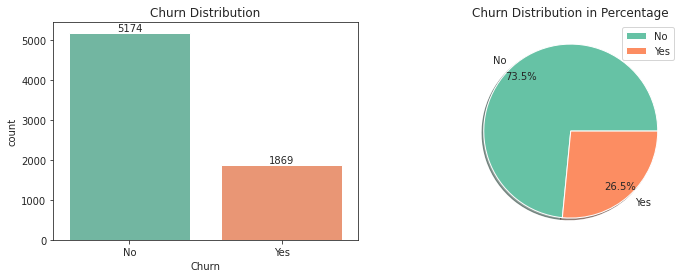

In [10]:
# Check Churn distribution
palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
ax = sns.countplot(x='Churn', data=data, palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Churn Distribution')

plt.subplot(1,2,2)
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].unique(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.title('Churn Distribution in Percentage')
plt.legend()
plt.show()

Tujuan dari analisis ini adalah untuk memprediksi apakah customer akan meninggalkan perusahaan atau tidak, oleh karena itu perlu mengetahui berapa banyak jumlah customer yang meninggalkan perusahaan dan yang tidak. Jumlah customer yang meninggalkan perusahaan ada 1869. Sedangkan customer yang tidak meninggalkan perusahaan ada 5174. Dapat disimpulkan bahwa data pada kolom Churn, imbalance karena tidak seimbang antara jumlah customer yang meninggalkan perusahaan dan yang tidak. Jika dilihat dari persentasenya, persentase customer yang meninggalkan perusahaan ada 26,5% dan customer yang tidak meninggalkan perusahaan ada 73,5%.

## Tenure, Monthly Charges, and Total Charges

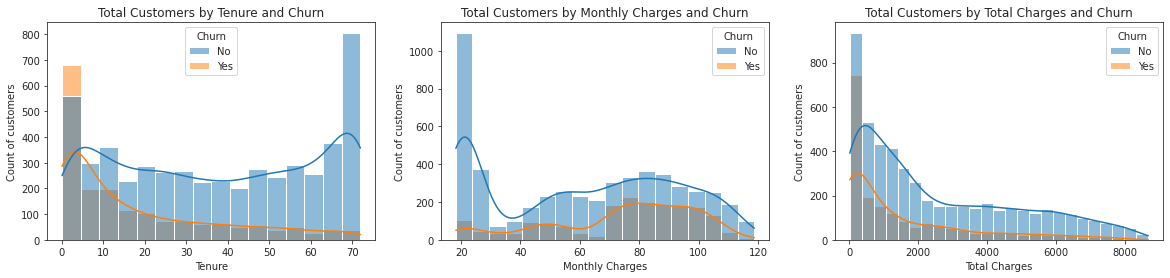

In [11]:
# Total Customers by Tenure, Monthly Charges, and Total Charges

f, axe = plt.subplots(1, 3,figsize=(20,4))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, ax=axe[0], color=palette)
axe[0].yaxis.tick_left()
axe[0].set(xlabel='Tenure', ylabel='Count of customers', title='Total Customers by Tenure and Churn');

sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, ax=axe[1], color=palette)
axe[1].yaxis.tick_left()
axe[1].set(xlabel='Monthly Charges', ylabel='Count of customers', title='Total Customers by Monthly Charges and Churn');

sns.histplot(data=data, x='TotalCharges', hue='Churn', kde=True, ax=axe[2], color=palette)
axe[2].yaxis.tick_left()
axe[2].set(xlabel='Total Charges', ylabel='Count of customers', title='Total Customers by Total Charges and Churn');

Berdasarkan grafik di atas, dapat diperoleh informasi bahwa:
- Customer baru lebih berkemungkinan untuk meninggalkan perusahaan, dibandingkan dengan customer lama
- Customer dengan MonthlyCharges yang tinggi, cenderung memilih untuk meninggalkan perusahaan.
- TotalCharge tidak membedakan antara customer churn dan yang tidak.

## Gender

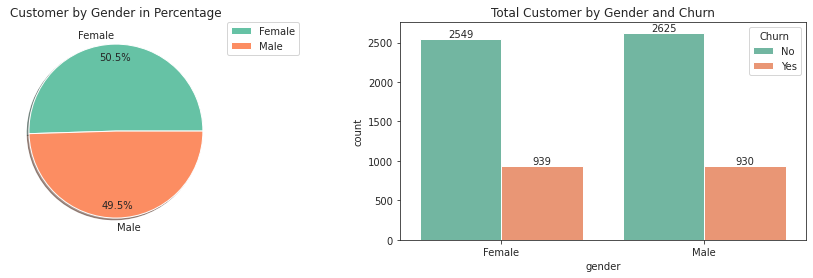

In [12]:
# Total Customer by Gender

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.pie(data['gender'].value_counts(), labels = data['gender'].unique(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.title('Customer by Gender in Percentage')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.subplot(1,2,2)
ax = sns.countplot(x='gender', data=data, hue = 'Churn', palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Total Customer by Gender and Churn')
plt.show()

Jumlah customer berdasarkan gender, menunjukkan bahwa 50,5% customer adalah perempuan, dan sisanya adalah laki-laki. Jika dilihat pada jumlah customer yang meninggalkan perusahaan, ditemukan bahwa tidak ada perbedaan antar gender. Walaupun jumlah customer churn dengan gender perempuan lebih banyak dibandingkan laki-laki, namun perbedaanya hanya 9 customer. Dapat disimpulkan bahwa gender tidak terlalu berpengaruh terhadap customer churn.

## Online Security

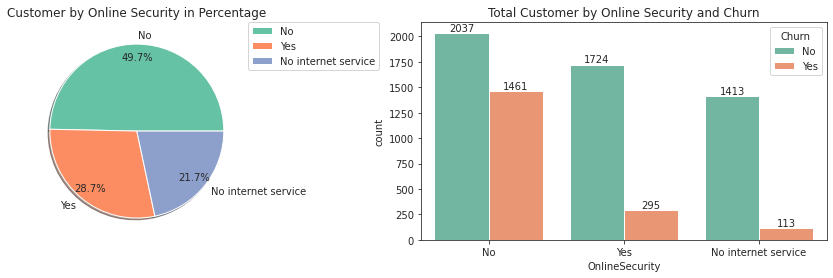

In [13]:
# Total Customer by Online Security

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.pie(data['OnlineSecurity'].value_counts(), labels = data['OnlineSecurity'].unique(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.title('Customer by Online Security in Percentage')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.subplot(1,2,2)
ax = sns.countplot(x='OnlineSecurity', data=data, hue = 'Churn', palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Total Customer by Online Security and Churn')
plt.show()

Customer yang tidak berlangganan online security mendominasi dari total customer dan cenderung memilih untuk meninggalkan perusahaan. Sebaliknya, customer yang berlangganan online security lebih berkemungkinan memilih untuk bertahan pada perusahaan tersebut.

## Tech Support

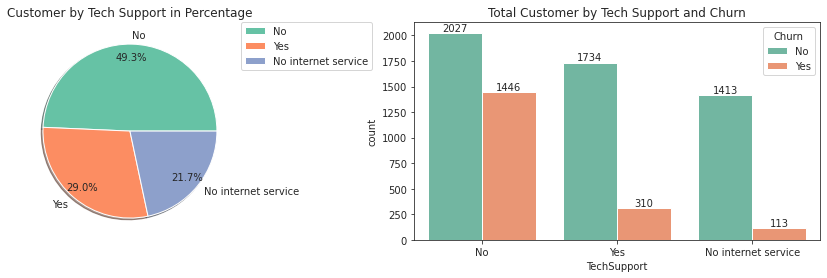

In [14]:
# Total Customer by Tech Support

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.pie(data['TechSupport'].value_counts(), labels = data['TechSupport'].unique(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.title('Customer by Tech Support in Percentage')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.subplot(1,2,2)
ax = sns.countplot(x='TechSupport', data=data, hue = 'Churn', palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Total Customer by Tech Support and Churn')
plt.show()

Customer yang tidak berlangganan tech support mendominasi dari total customer dan cenderung memilih untuk meninggalkan perusahaan. Sebaliknya, customer yang berlangganan tech support lebih berkemungkinan memilih untuk bertahan pada perusahaan tersebut.

## Customer by Contract

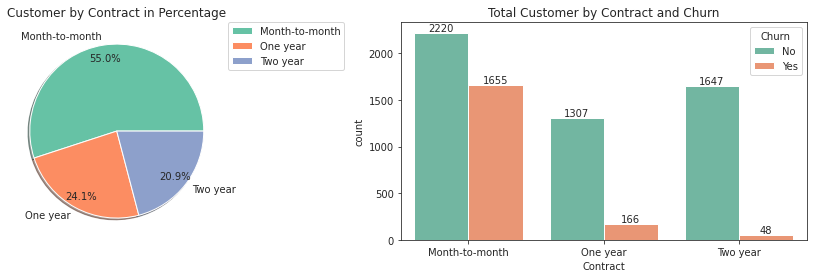

In [15]:
# Total Customer by Contract

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.pie(data['Contract'].value_counts(), labels = data['Contract'].unique(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.title('Customer by Contract in Percentage')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.subplot(1,2,2)
ax = sns.countplot(x='Contract', data=data, hue = 'Churn', palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Total Customer by Contract and Churn')
plt.show()

Customer yang jangka waktu berlangganannya dari bulan ke bulan (Month-to-Month)mendominasi dari total customer dan cenderung memilih untuk meninggalkan perusahaan. Sebaliknya, customer yang jangka waktu berlangganannya satu tahu atau dua tahun lebih berkemungkinan memilih untuk bertahan pada perusahaan tersebut.

## Payment Method

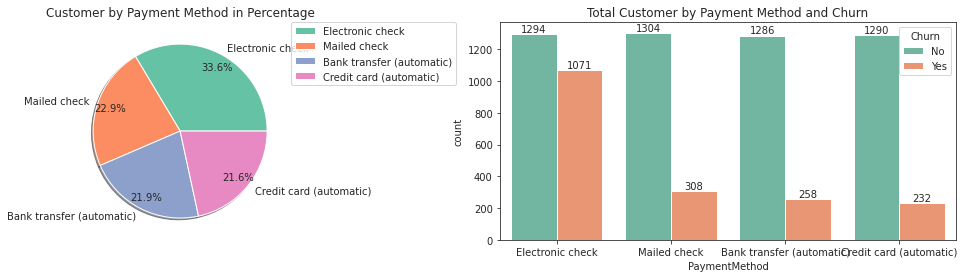

In [16]:
# Total Customer by Payment Method

plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
plt.pie(data['PaymentMethod'].value_counts(), labels = data['PaymentMethod'].unique(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.title('Customer by Payment Method in Percentage')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.subplot(1,2,2)
ax = sns.countplot(x='PaymentMethod', data=data, hue = 'Churn', palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Total Customer by Payment Method and Churn')
plt.show()

Elektronic check merupakan metode pembayaran paling banyak dari total customers, namun customer yang meninggalkan perusahaan dengan metode pembayaran ini juga paling banyak.

# 5. Data Preprocessing

## Feature Selection

Untuk mengetahui hubungan korelasi dan feature important yang dapat memengaruhi Churn, maka terlebih dahulu data categorical harus diencode.

In [17]:
# Encode Binary Features
encoder = OrdinalEncoder()
bin_columns_df = data[bin_columns]
bin_encoded = encoder.fit_transform(bin_columns_df)
bin_encoded = pd.DataFrame(bin_encoded, columns=bin_columns)

In [18]:
# Encode Categorical Features
cat_columns_df = data[cat_columns]
cat_encoded = pd.get_dummies(cat_columns_df)

Berikut adalah pendefinisian dari numerical features.

In [19]:
# Define Numerical Features
num_columns = data[num_columns]

Data target juga harus diencode terlebih dahulu.

In [20]:
encoder = OrdinalEncoder()
Churn= data[['Churn']]
Churn_encoded = encoder.fit_transform(Churn)
Churn = pd.DataFrame(Churn_encoded, columns=['Churn'])

Berikut adalah data baru yang akan dihitung nilai korelasinya dan akan ditentukan feature apa saja yang merupakan feature important.

In [21]:
data_new = pd.concat([Churn, bin_encoded, cat_encoded, num_columns], axis=1)
data_new

,Churn,SeniorCitizen,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,...,1,0,0,0,0,1,0,1,29.85,29.85
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,0,...,1,0,0,0,0,0,1,2,53.85,108.15
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,...,0,1,0,1,0,0,0,45,42.30,1840.75
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,...,1,0,0,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0,1,...,0,1,0,0,0,0,1,24,84.80,1990.50
7039,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,1,...,0,1,0,0,1,0,0,72,103.20,7362.90
7040,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1,0,...,1,0,0,0,0,1,0,11,29.60,346.45
7041,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,1,...,1,0,0,0,0,0,1,4,74.40,306.60


Menghitung nilai korelasi dengan Pearson Correlation Matrix.

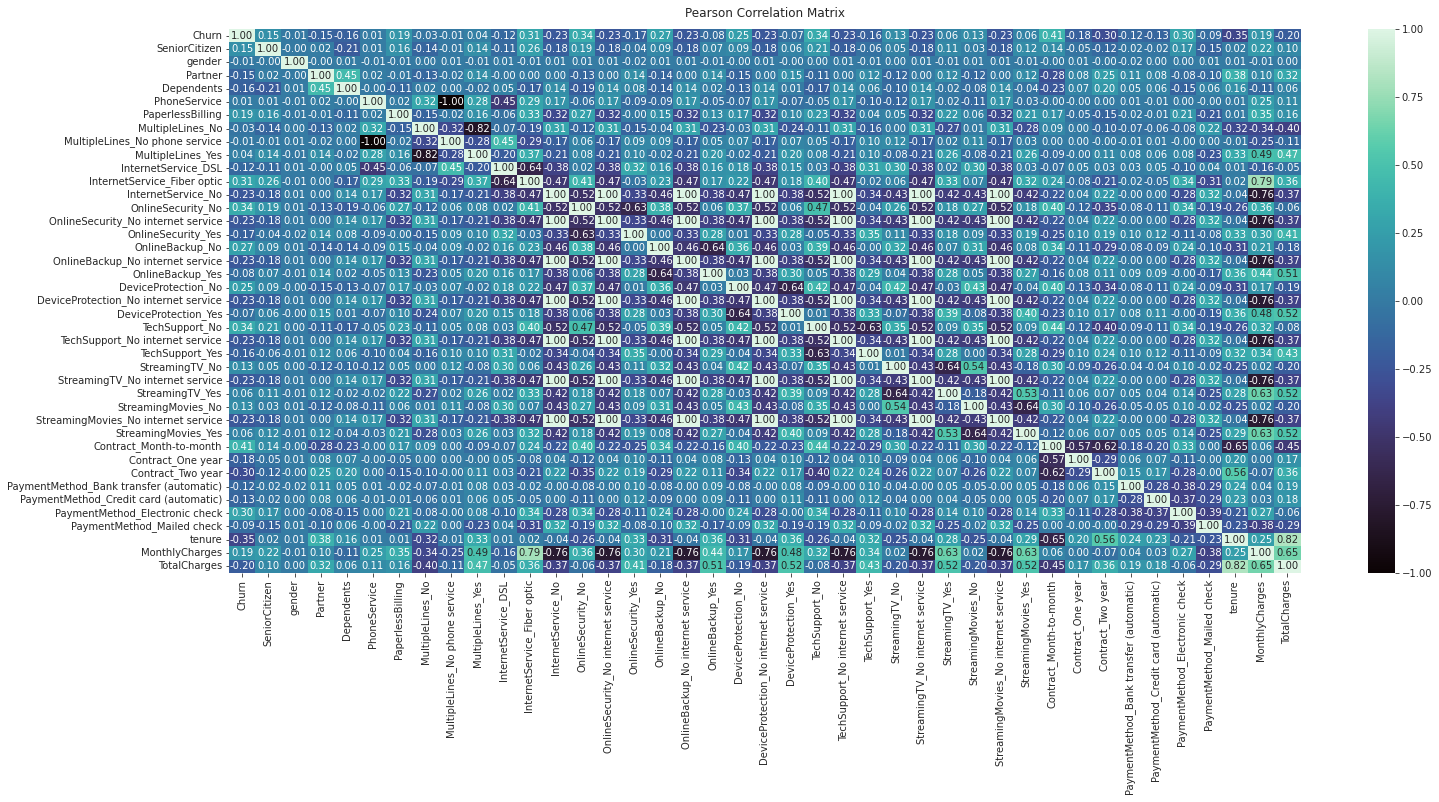

In [22]:
# Correlation

plt.figure(figsize=(24, 10))
heatmap = sns.heatmap(data_new.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='mako')
heatmap.set_title('Pearson Correlation Matrix', fontdict={'fontsize':12}, pad=12);

In [23]:
# Get List of All Correlation of Churn

final_column = np.abs(data_new.corr()['Churn']) >= 0.15
final_column = final_column[final_column==True]
final_column

Churn                                   True
SeniorCitizen                           True
Partner                                 True
Dependents                              True
PaperlessBilling                        True
InternetService_Fiber optic             True
InternetService_No                      True
OnlineSecurity_No                       True
OnlineSecurity_No internet service      True
OnlineSecurity_Yes                      True
OnlineBackup_No                         True
OnlineBackup_No internet service        True
DeviceProtection_No                     True
DeviceProtection_No internet service    True
TechSupport_No                          True
TechSupport_No internet service         True
TechSupport_Yes                         True
StreamingTV_No internet service         True
StreamingMovies_No internet service     True
Contract_Month-to-month                 True
Contract_One year                       True
Contract_Two year                       True
PaymentMet

Jika dilihat dari nilai korelasinya, feature yang memiliki korelasi tertinggi terhadap customer churn (nilai korelasinya di atas 0,15 adalah SeniorCitizen, PaperlessBilling, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaymentMethod, dan MonthlyCharges. Sedangkan feature lainnya memiliki nilai korelasi yang rendah, atau dapat dikatakan memiliki hubungan keeratan yang lemah dengan customer churn.

Feature yang dipilih dalam pembuatan model adalah sebagai berikut :

In [24]:
data_final = data[['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'tenure', 'MonthlyCharges', 
                   'TotalCharges', 'Churn']]

# Encode target value
data_final['SeniorCitizen'] = data_final['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
data_final['Churn'] = data_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

## Data Inference Selection

Data inference adalah data yang bukan termasuk dalam data training maupun test. Pembagian data inference ini diperlukan untuk mengevaluasi model apakah model dapat memperkirakan label (y) jika ditambahkan data baru. Data inference yang akan ditentukan adalah 10 data, diambil secara random dari data, dengan random_state yang ditetapkan = 42.

In [25]:
# Get Data for Model Inference

data_inf = data_final.sample(10, random_state=42)
data_inf

,SeniorCitizen,Partner,Dependents,PaperlessBilling,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
185,No,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Electronic check,1,24.80,24.80,1
2715,No,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Bank transfer (automatic),41,25.25,996.45,0
3825,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,52,19.35,1031.70,0
1807,No,No,No,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,1,76.35,76.35,1
132,No,No,No,No,DSL,No,No,No,Yes,No,No,Two year,Bank transfer (automatic),67,50.55,3260.10,0
1263,Yes,Yes,No,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Bank transfer (automatic),68,89.60,6127.60,1
3732,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Bank transfer (automatic),23,77.15,1759.40,0
1672,No,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Credit card (automatic),72,72.10,5016.65,0
811,No,No,No,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Credit card (automatic),70,104.00,7250.15,1
2526,No,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,1,19.40,19.40,1


## Data Train and Test Selection

Data yang akan diuji adalah dataset tanpa data inference, sehingga index data inference perlu dihapus terlebih dahulu.

In [26]:
# Remove Inference-set from Dataset

data_train_val_test = data_final.drop(data_inf.index)
data_train_val_test

,SeniorCitizen,Partner,Dependents,PaperlessBilling,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,1,29.85,29.85,0
1,No,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,34,56.95,1889.50,0
2,No,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,2,53.85,108.15,1
3,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),45,42.30,1840.75,0
4,No,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,24,84.80,1990.50,0
7039,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),72,103.20,7362.90,0
7040,No,Yes,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check,11,29.60,346.45,0
7041,Yes,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check,4,74.40,306.60,1


Reset_index() digunakan untuk me-reset indeks yang telah ter-reset dan menjadikan indeksnya default, yaitu berupa bilangan integer yang dimulai dari 0. Reset_index dilakukan pada data_train_test dan data inference.

In [27]:
# Reset Index

data_train_val_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Mendefinisikan variabel X dan y.

In [28]:
X = data_train_val_test.drop(['Churn',], axis=1)
y = data_train_val_test['Churn']

Synthetic Minority Oversampling Technique (SMOTE) adalah teknik oversampling dan banyak digunakan untuk menangani dataset yang imbalanced. Teknik ini mensintesis titik data baru untuk kelas minoritas dan mengambil sampel berlebih dari kelas tersebut. SMOTE yang akan digunakan adalah SMOTENC karena data memiliki categorical features.

In [29]:
# Oversampling Technique

smote_nc = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
y_resampled.value_counts()

0    5169
1    5169
Name: Churn, dtype: int64

Splitting dataset diperlukan untuk membagi dataset menjadi dua bagian, yaitu data training dan data_test dengan proporsi tertentu. Proporsi ukuran yang digunakan untuk splitting data adalah 80% untuk data training dan 20% untuk data test.

In [30]:
# split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8270, 16)
(2068, 16)
(8270,)
(2068,)


Data train akan dibagi menjadi dua bagian, yaitu data training dan data validation dengan proporsi tertentu. Proporsi ukuran yang digunakan untuk splitting data adalah 80% untuk data training dan 20% untuk data validation.

In [31]:
# split data train dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6616, 16)
(1654, 16)
(6616,)
(1654,)


## Data Distribution

Dalam menganalisis data kita perlu memahami distribusi data pada tiap kolom. Distribusi data akan membantu kita mendeteksi masalah yang mungkin ada seperti adanya outliers atau pencilan yang ekstrim dan deviasi atau penyimpangan yang besar. Skewness dapat menunjukkan kondisi pembagian atau distribusi data. 

*Skewness* memberikan gambaran distribusi data apakah miring ke kiri, kanan atau simetri. 
- Jika kemiringan antara -0,5 dan 0,5, maka data cukup simetris.
- Jika kemiringan antara -1 dan –0,5 atau antara 0,5 dan 1, maka data cukup miring.
- Jika kemiringan kurang dari -1 atau lebih besar dari 1, maka data sangat miring.

Berikut nilai distribusi dari masing-masing feature :

In [32]:
# Define Categorical Column & Numerical Column
bin_col = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']
cat_col = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',]
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [33]:
# Check Distributions

X_train_skewness = pd.DataFrame(X_train[num_col].skew(axis=0), columns=['skewness_value']).reset_index()
X_train_skewness.rename(columns={'index':'column'}, inplace=True)
X_train_skewness['distribution'] = np.where(
    (X_train_skewness['skewness_value'] < 0.5) & (X_train_skewness['skewness_value'] > -0.5),'normal', 
    'skewed')
X_train_skewness

,column,skewness_value,distribution
0,tenure,0.517889,skewed
1,MonthlyCharges,-0.418129,normal
2,TotalCharges,1.144893,skewed


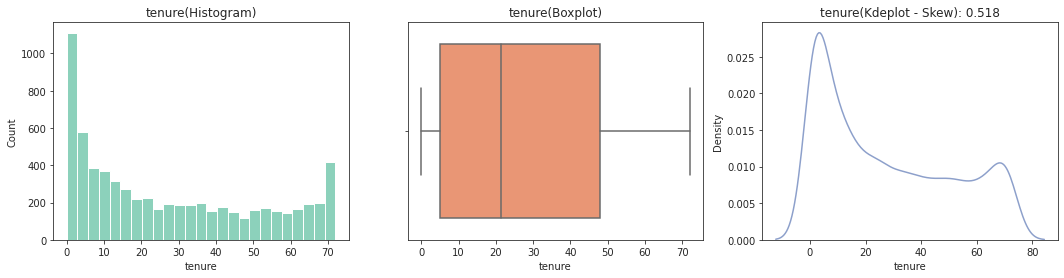

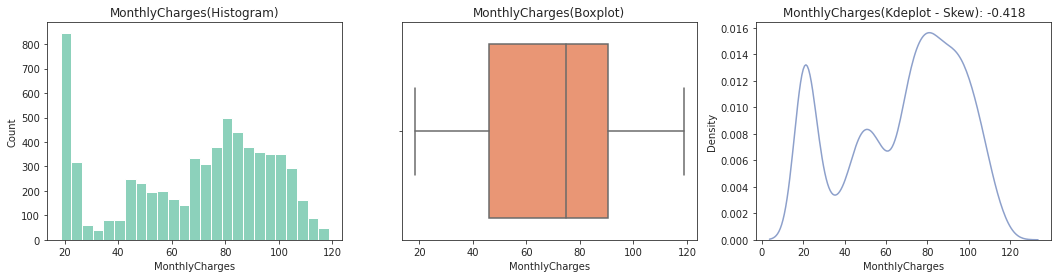

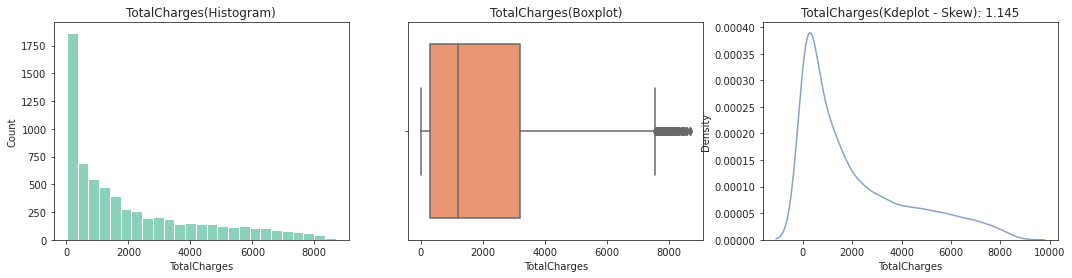

In [34]:
# Visualization of Column Distributions
for col in X_train[num_col]:
    fig, ax = plt.subplots(1,3, figsize=(18,4))

    sns.histplot(x=X_train[col], ax=ax[0], bins=25, color=palette[0])
    sns.boxplot(x=X_train[col], ax=ax[1], color=palette[1])
    sns.kdeplot(x=X_train[col], ax=ax[2], color=palette[2])
    skew_val = round(X_train[col].skew(),3)

    ax[0].set_title(col + '(Histogram)')
    ax[1].set_title(col + '(Boxplot)')
    ax[2].set_title(col + '(Kdeplot - Skew): ' + str(skew_val))
    plt.show()

## Handling Outliers

Outlier adalah kasus atau data yang memiliki karakteristik unik yang terlihat sangat berbeda jauh dari nilai observasi lainnya dan muncul dalam bentuk ekstrem. Untuk mendeteksi adanya outlier, dapat dilihat dari skew atau kemiringannya. Data yang memiliki skewness atau kemiringan yang tinggi merupakan data yang tidak terdistribusi normal, salah satu penyebabnya adalah karena terdapat outlier dari data tersebut. 

Jika dilihat pada distribusi boxplot pada masing-masing feature, beberapa feature memiliki outlier. Cara mengatasi outlier tersebut adalah dengan mengganti nilai outliers dengan nilai lain tergantung dari distribusi feature.

In [35]:
# Function to Get Lower and Upper Boundaries for Skewed Distributions

def IQR_boundaries(data, variable):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [36]:
# Function to Get Lower and Upper Boundaries for Normal Distributions

def normal_boundaries(data, variable):
    upper_boundary = data[variable].mean() + (data[variable].std() * 3)
    lower_boundary = data[variable].mean() - (data[variable].std() * 3)

    return upper_boundary, lower_boundary

In [37]:
# Get Upper-Boundary and Lower-Boundary from Each Column

X_train_outlier = {
    'column': [],
    'right_tail': [],
    'left_tail': [],
    'right_tail_percentage': [],
    'left_tail_percentage': [],
    'outliers': [],
    'outliers_percentage': []
}

for row in X_train_skewness.index.tolist():
    col = X_train_skewness.iloc[row]['column']
    dist = X_train_skewness.iloc[row]['distribution']
    if dist == 'normal' :
        upper_boundary, lower_boundary = normal_boundaries(X_train, col)
    else:
        upper_boundary, lower_boundary = IQR_boundaries(X_train, col)
    
    right_tail = len(X_train[X_train[col] > upper_boundary])
    left_tail = len(X_train[X_train[col] < lower_boundary])
    right_tail_percentage = right_tail / len(X_train)*100
    left_tail_percentage = left_tail / len(X_train)*100
    outliers = right_tail + left_tail
    outliers_percentage = right_tail_percentage + left_tail_percentage

    X_train_outlier['column'].append(col)
    X_train_outlier['right_tail'].append(right_tail)
    X_train_outlier['left_tail'].append(left_tail)
    X_train_outlier['right_tail_percentage'].append(right_tail_percentage)
    X_train_outlier['left_tail_percentage'].append(left_tail_percentage)
    X_train_outlier['outliers'].append(outliers)
    X_train_outlier['outliers_percentage'].append(outliers_percentage)

X_train_outlier = pd.DataFrame(X_train_outlier)

In [38]:
# Merge X_train_skewness and X_train_outlier

pd.merge(X_train_skewness, X_train_outlier, on='column')

,column,skewness_value,distribution,right_tail,left_tail,right_tail_percentage,left_tail_percentage,outliers,outliers_percentage
0,tenure,0.517889,skewed,0,0,0.000000,0.0,0,0.000000
1,MonthlyCharges,-0.418129,normal,0,0,0.000000,0.0,0,0.000000
2,TotalCharges,1.144893,skewed,122,0,1.844015,0.0,122,1.844015


Berdasarkan tabel di atas, diketahui bahwa hanya TotalCharges yang memiliki outliers. Untuk mengatasi masalah outlier tersebut dapat dilakukan dengan :
- Trimming, jika outliers < 5%
- Capping, jika outliers 5% - 15%
- Jika lebih dari 15%, outliers tidak perlu ditrimming/capping.

Trimming juga akan dibagi menjadi dua, yaitu trimming menggunakan IQR dan Gaussian. IQR untuk kolom yang berdistribusi skewed, sedangan Gaussian untuk kolom yang berdistribusi normal.

- Feature TotalCharges akan ditrimming menggunakan IQR, karena kolom tersebut memiliki outliers < 5% dan berdistribusi skewed.

In [39]:
# Handling Outlier for Column TotalCharges

print('X_train - Before Outlier Handling : ', X_train.shape)
Outlier_trimmer = OutlierTrimmer(capping_method='iqr',
                          tail='both',  
                          fold=1.5,
                          variables=['TotalCharges'])

Outlier_trimmer.fit(X_train)

X_train_clean_outlier = Outlier_trimmer.transform(X_train)
print('X_train - After Outlier Handling : ', X_train_clean_outlier.shape)

X_train - Before Outlier Handling :  (6616, 16)
X_train - After Outlier Handling :  (6494, 16)


In [40]:
# Adjust Index for y_train

X_train_clean = X_train_clean_outlier.copy()
y_train.drop(y_train.index.difference(X_train_clean.index), inplace=True)
y_train.shape

(6494,)

## Pipeline for Scaling & Encoding

Berikut ini adalah preprocessing data dengan menerapkan Pipeline, di mana data numerical akan discale dan data categorical akan diencode, kemudian kedua data tersebut akan digabungkan dengan pada pipeline yang sama dengan menggunakan ColumnTransformer.

In [41]:
# Pipeline for numerical columns
numerical_pipeline = Pipeline([('scaler', StandardScaler())])

# Pipeline for binary columns
binary_pipeline = Pipeline([('encode', OrdinalEncoder())])

# Pipeline for categorical columns
categorical_pipeline = Pipeline([('encode', OneHotEncoder())])

# ColumnTransformer for numerical and categorical columns
Preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, num_col),
    ('binary', binary_pipeline, bin_col),
    ('categorical', categorical_pipeline, cat_col)])

Preprocessor.fit(X_train)
X_train_scaled = Preprocessor.transform(X_train_clean)
X_val_scaled = Preprocessor.transform(X_val)
X_test_scaled = Preprocessor.transform(X_test)

## Pipeline Tensorflow

Dengan menggunakan tf.data.Dataset.from_tensor_slices(), data X dan y akan digabungkan ke dalam bentuk array.

In [42]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(10)

#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val))
val_dataset = val_dataset.batch(10)

#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test))
test_dataset = test_dataset.batch(10)

# 6. Model Definition

Model yang digunakan adalah model Artifical Neural Network dengan menggunakan Sequential API dan Functional API.

## 6.1 Model 1 dengan ANN Sequential API

Pada model Artifical Neural Network dengan menggunakan Sequential API, Layer dense pertama menggunakan 32 neuron dengan fungsi aktivasi rectified linear (relu). Selanjutnya dropout digunakan di antara layer dense pertama dan kedua, dengan nilai dropout sebesar 0,5. Pada layer dense kedua menggunakan 16 neuron fungsi aktivasi relu, dan output layer menggunakan fungsi aktivasi sigmoid untuk memprediksi nilai kelas 0 atau 1.

Model dioptimalkan menggunakan binary cross entropy loss function, fungsi ini digunakan khusus untuk masalah klasifikasi biner. Optimizer menggunakan Adam. Serta, metrics yang digunakan adalah accuracy.

In [43]:
# Define Model ANN Dense 1=64, Dense 2= 32, Without Dropout

model_1 = Sequential([
                   Dense(64, activation='relu', input_shape=(35,)), 
                   Dense(32, activation='relu'),
                   Dense(1, activation='sigmoid')])

# Compile the Model
model_1.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2304      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


## 6.2 Model 2 dengan ANN Functional API

Pada model Artifical Neural Network dengan menggunakan Functional API, input layer adalah shape=(25,), sesuai dengan ukuran data. Layer dense pertama menggunakan 32 neuron dengan fungsi aktivasi rectified linear (relu). Selanjutnya dropout digunakan di antara layer dense pertama dan kedua, dengan nilai dropout sebesar 0,5. Pada layer dense kedua menggunakan 16 neuron fungsi aktivasi relu, dan output layer menggunakan fungsi aktivasi sigmoid untuk memprediksi nilai kelas 0 atau 1.

Model dioptimalkan menggunakan binary cross entropy loss function, fungsi ini digunakan khusus untuk masalah klasifikasi biner. Optimizer menggunakan Adam. Serta, metrics yang digunakan adalah accuracy.

In [44]:
# Define Model ANN Dense 1=64, Dense 2= 32, With Dropout 0.5

data_input = Input(shape=(35,))
hidden_1 = Dense(64, activation='relu')(data_input)
drop_1 = Dropout(0.5)(hidden_1)
hidden_2 = Dense(32, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(hidden_2)
output_layer = Dense(1, activation='sigmoid')(drop_2)

model_2 = Model(inputs=data_input, outputs=output_layer)

# Compile the Model
model_2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2304      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable par

# 7. Model Training

Bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan.

In [45]:
# Training Model 1
history_1 = model_1.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
650/650 [==============================] - 5s 5ms/step - loss: 0.4400 - accuracy: 0.7961 - val_loss: 0.4015 - val_accuracy: 0.8126
Epoch 2/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4087 - accuracy: 0.8095 - val_loss: 0.3979 - val_accuracy: 0.8144
Epoch 3/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4023 - accuracy: 0.8146 - val_loss: 0.4042 - val_accuracy: 0.8132
Epoch 4/50
650/650 [==============================] - 3s 5ms/step - loss: 0.3972 - accuracy: 0.8137 - val_loss: 0.3994 - val_accuracy: 0.8235
Epoch 5/50
650/650 [==============================] - 3s 5ms/step - loss: 0.3939 - accuracy: 0.8223 - val_loss: 0.3961 - val_accuracy: 0.8198
Epoch 6/50
650/650 [==============================] - 3s 5ms/step - loss: 0.3903 - accuracy: 0.8198 - val_loss: 0.3928 - val_accuracy: 0.8265
Epoch 7/50
650/650 [==============================] - 3s 5ms/step - loss: 0.3857 - accuracy: 0.8229 - val_loss: 0.3948 - val_accuracy: 0.8295
Epoch 

In [46]:
# Training Model 2
history_2 = model_2.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
650/650 [==============================] - 4s 5ms/step - loss: 0.5096 - accuracy: 0.7633 - val_loss: 0.4214 - val_accuracy: 0.8023
Epoch 2/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4519 - accuracy: 0.7989 - val_loss: 0.4115 - val_accuracy: 0.8065
Epoch 3/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4466 - accuracy: 0.7969 - val_loss: 0.4027 - val_accuracy: 0.8096
Epoch 4/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4350 - accuracy: 0.8041 - val_loss: 0.4021 - val_accuracy: 0.8126
Epoch 5/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4272 - accuracy: 0.8100 - val_loss: 0.4008 - val_accuracy: 0.8108
Epoch 6/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4310 - accuracy: 0.8081 - val_loss: 0.4000 - val_accuracy: 0.8126
Epoch 7/50
650/650 [==============================] - 3s 5ms/step - loss: 0.4240 - accuracy: 0.8126 - val_loss: 0.3985 - val_accuracy: 0.8138
Epoch 

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. 

## Model ANN Sequential API

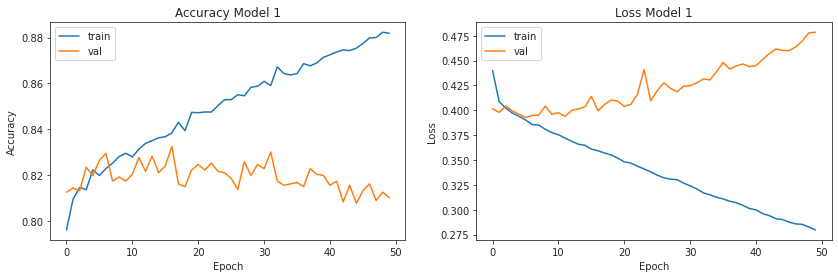

In [47]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy Model 1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Loss Model 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Tingkat accuracy model ANN menggunakan Sequential API, tidak overfitting karena accuracy pada data train dan data validation cenderung sama. Pada grafik loss, diketahui bahwa semakin banyak epoch maka data semakin tidak overfitting. Nilai loss cenderung rendah karena di bawah 0,5.

In [48]:
# Inference Binary Class
y_pred_1 = model_1.predict(X_test_scaled)
y_pred_1[y_pred_1 <= 0.5] = 0
y_pred_1[y_pred_1 > 0.5] = 1
y_pred_1 = y_pred_1.squeeze() # mengubah matriks jadi vektor

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1045
           1       0.78      0.84      0.81      1023

    accuracy                           0.81      2068
   macro avg       0.81      0.81      0.81      2068
weighted avg       0.81      0.81      0.81      2068



Berdasarkan classification report, diketahui bahwa model ANN dengan menggunakan Sequential API memiliki nilai: 
- Accuracy score 0,79, artinya tingkat akurasi model pada test set dalam mengklasifikasikan dengan benar adalah 79%.
- Precision 0.80, artinya tingkat akurasi customers yang churn (meninggalkan perusahaan) dari keseluruhan customers yang diprediksi meninggalkan perusahaan adalah 80%.
- Recall 0.81, artinya tingkat akurasi customers yang diprediksi meninggalkan perusahaan dibandingkan keseluruhan customers yang sebenarnya meninggalkan perusahaan adalah 81%.
- F1-score 0.81, artinya perbandingan rata-rata precion dan recall yang dibobotkan adalah 81%.

## Model Functional API

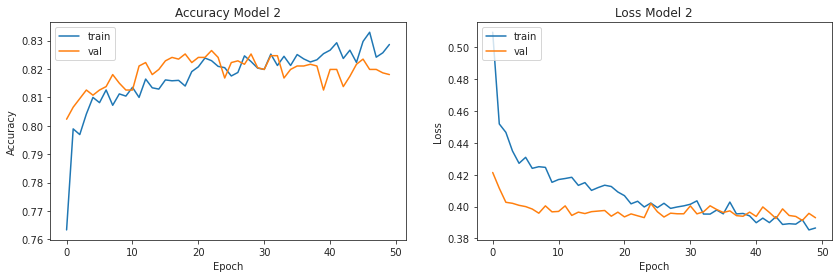

In [49]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy Model 2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Loss Model 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model ANN menggunakan Functional API termasuk overfitting karena accuracy pada data train lebih tinggi dibanding accuracy pada data validation. Pada grafik loss, diketahui bahwa model overfitting, karena loss pada data train lebih tinggi dibandingkan loss pada data validation. Nilai loss cenderung rendah karena di bawah 0,5.

In [50]:
# Inference Binary Class
y_pred_2 = model_2.predict(X_test_scaled)
y_pred_2[y_pred_2 <= 0.5] = 0
y_pred_2[y_pred_2 > 0.5] = 1
y_pred_2 = y_pred_2.squeeze() # mengubah matriks jadi vektor

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1045
           1       0.81      0.80      0.81      1023

    accuracy                           0.81      2068
   macro avg       0.81      0.81      0.81      2068
weighted avg       0.81      0.81      0.81      2068



Berdasarkan classification report, diketahui bahwa model ANN dengan menggunakan Functional API memiliki nilai: 
- Accuracy score 0,80, artinya tingkat akurasi model pada test set dalam mengklasifikasikan dengan benar adalah 80%.
- Precision 0.79, artinya tingkat akurasi customers yang churn (meninggalkan perusahaan) dari keseluruhan customers yang diprediksi meninggalkan perusahaan adalah 79%.
- Recall 0.85, artinya tingkat akurasi customers yang diprediksi meninggalkan perusahaan dibandingkan keseluruhan customers yang sebenarnya meninggalkan perusahaan adalah 85%.
- F1-score 0.82, artinya perbandingan rata-rata precion dan recall yang dibobotkan adalah 82%.

## Best Model Selection

In [51]:
# Create Metrics Evaluation Dataframe
metrics_eval = pd.DataFrame({'Model': [],
                             'Test_Precision':[],
                             'Test_Recall':[],
                             'Test_F1-score':[],
                             'Test_Accuracy':[]})

prec_1 = precision_score(y_test, y_pred_1)
rec_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)
score_1 = accuracy_score(y_test, y_pred_1)


prec_2 = precision_score(y_test, y_pred_2)
rec_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)
score_2 = accuracy_score(y_test, y_pred_2)

r = metrics_eval.shape[0]
metrics_eval.loc[r] = ['Model 1', prec_1, rec_1, f1_1, score_1]
metrics_eval.loc[r+1] = ['Model 2', prec_2, rec_2, f1_2, score_2]
pd.set_option('display.max_colwidth', None)
metrics_eval

,Model,Test_Precision,Test_Recall,Test_F1-score,Test_Accuracy
0,Model 1,0.782727,0.841642,0.811116,0.806093
1,Model 2,0.810891,0.800587,0.805706,0.808994


Model terbaik adalah model Artifical Neural Network dengan menggunakan Sequential API, walaupun memiliki accuracy score yang lebih rendah dibandingkan Functional API, namun jika dilihat pada grafik accuracy dan loss, dapat dilihat bahwa model ANN dengan menggunakan Sequential API tidak overfit atau goodfit.

# 9. Model Saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [52]:
# saving preprocessor

with open("preprocessor.pkl", "wb") as pipe_file:
    pickle.dump(Preprocessor, pipe_file)

In [53]:
# saving and loading the .h5 model
 
# save model
model_2.save('gfgModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('gfgModel.h5')
savedModel.summary()

Model Saved!
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2304      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-

# 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Data inference yang akan digunakan adalah sebagai berikut:

In [54]:
data_inf

,SeniorCitizen,Partner,Dependents,PaperlessBilling,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Electronic check,1,24.80,24.80,1
1,No,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Bank transfer (automatic),41,25.25,996.45,0
2,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,52,19.35,1031.70,0
3,No,No,No,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,1,76.35,76.35,1
4,No,No,No,No,DSL,No,No,No,Yes,No,No,Two year,Bank transfer (automatic),67,50.55,3260.10,0
5,Yes,Yes,No,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Bank transfer (automatic),68,89.60,6127.60,1
6,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Bank transfer (automatic),23,77.15,1759.40,0
7,No,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Credit card (automatic),72,72.10,5016.65,0
8,No,No,No,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Credit card (automatic),70,104.00,7250.15,1
9,No,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,1,19.40,19.40,1


Data akan displit untuk menentukan data X_inf dan y_inf.

In [55]:
# Split Numerical and Categorical Columns
X_inf = data_inf.drop(['Churn'], axis=1)
y_inf = data_inf['Churn']

Data akan discaling menggunakan pipeline yang sudah didefinisikan sebelumnya.

In [56]:
X_inf_scaled = Preprocessor.transform(X_inf)

Mengklasifikasikan customer churn atau tidak dengan model terbaik menurut model evaluation, yaitu menggunakan model Artifical Neural Network dengan menggunakan Sequential API.

In [57]:
# Predict Model Inference

y_pred_inf = savedModel.predict(X_inf_scaled)
y_pred_inf[y_pred_inf <= 0.5] = 0
y_pred_inf[y_pred_inf > 0.5] = 1
y_pred_inf = y_pred_inf.squeeze() # mengubah matriks jadi vektor
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn_prediction'])

Data prediksi customers churn akan digabungkan dengan data inference sebelumnya, untuk membandingkan customers churn aktual dan prediksi.

In [58]:
# Concate to Original Inference-Set

pd.concat([data_inf, y_pred_inf], axis=1)

,SeniorCitizen,Partner,Dependents,PaperlessBilling,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn,Churn_prediction
0,No,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Electronic check,1,24.80,24.80,1,1.0
1,No,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Bank transfer (automatic),41,25.25,996.45,0,0.0
2,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,52,19.35,1031.70,0,0.0
3,No,No,No,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,1,76.35,76.35,1,1.0
4,No,No,No,No,DSL,No,No,No,Yes,No,No,Two year,Bank transfer (automatic),67,50.55,3260.10,0,0.0
5,Yes,Yes,No,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Bank transfer (automatic),68,89.60,6127.60,1,0.0
6,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Bank transfer (automatic),23,77.15,1759.40,0,0.0
7,No,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Credit card (automatic),72,72.10,5016.65,0,0.0
8,No,No,No,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Credit card (automatic),70,104.00,7250.15,1,0.0
9,No,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,1,19.40,19.40,1,0.0


Dengan percobaan menggunakan data inference, Model Artifical Neural Network dengan menggunakan Sequential API bisa digunakan untuk mengklasifikasikan customers yang meninggalkan perusahaan dan customers yang tidak meninggalkan perusahaan.

# 11. Conclusion

Berikut adalah kesimpulan dari eksplorasi data dan evaluasi model:
1. Tujuan dari analisis ini adalah untuk memprediksi apakah customer akan meninggalkan perusahaan atau tidak, oleh karena itu perlu mengetahui berapa banyak jumlah customer yang meninggalkan perusahaan dan yang tidak. Jumlah customer yang meninggalkan perusahaan ada 1869. Sedangkan customer yang tidak meninggalkan perusahaan ada 5174. Dapat disimpulkan bahwa data pada kolom Churn, imbalance karena tidak seimbang antara jumlah customer yang meninggalkan perusahaan dan yang tidak. Jika dilihat dari persentasenya, persentase customer yang meninggalkan perusahaan ada 26,5% dan customer yang tidak meninggalkan perusahaan ada 73,5%.

2. Terdapat data missing values pada kolom TotalCharges. Mssing values pada kolom TotalCharges diimput dengan nilai mean.

3. Berdasarkan pengujian pada feature selection, terdapat 8 feature importance yang dapat mempengaruhi kemungkinan customer churn (meninggalkan perusahaan) atau tidak.Feature importance tersebut yaitu TotalCharges, tenure, MonthlyCharges, Contract, PaymentMethod, OnlineSecurity, TechSupport, dan gender. Namun, karena gender memiliki nilai korelasi yang rendah, maka gender tidak diikutsertakan dalam feature selection, dan kolom InternetService akan diikutsertakan dalam feature selection.

4. Model terbaik adalah model Artifical Neural Network dengan menggunakan Sequential API, walaupun memiliki accuracy score yang lebih rendah dibandingkan Functional API, namun jika dilihat pada grafik accuracy dan loss, dapat dilihat bahwa model ANN dengan menggunakan Sequential API tidak overfit atau goodfit. Accuracy score pada model ini 0,79, artinya tingkat akurasi model pada test set dalam mengklasifikasikan dengan benar adalah 79%.

5. Dengan percobaan menggunakan data inference, Model Artifical Neural Network dengan menggunakan Sequential API bisa digunakan untuk mengklasifikasikan customers yang meninggalkan perusahaan dan customers yang tidak meninggalkan perusahaan.